<a href="https://colab.research.google.com/github/TetianaHrunyk/Time-series-analysis/blob/main/SeasonalDecomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Get the data

In [ ]:
df = yf.download('EURUSD=X', period='6mo', interval='1D')
df.index = pd.to_datetime(df.index)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.index.freq = "B"

### Seasonal decomposition with statsmodels

In [ ]:
decomposition = seasonal_decompose(df["Open"])

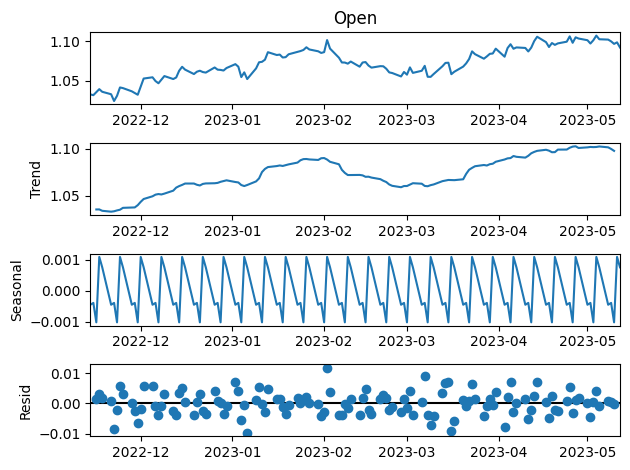

In [ ]:
decomposition.plot();

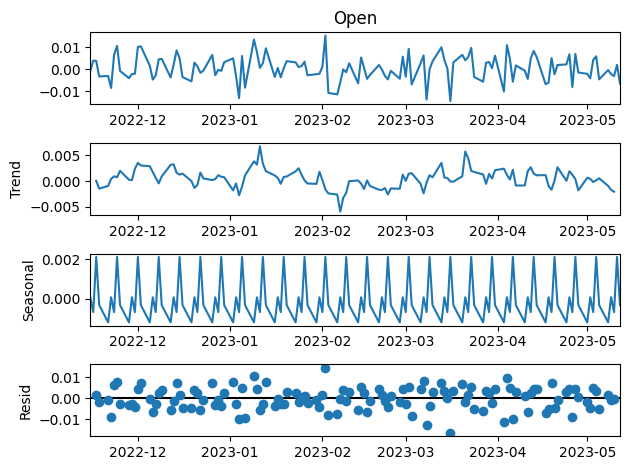

In [ ]:
seasonal_decompose(df["Open"].diff().dropna()).plot();

### Seasonal component with pandas

In [ ]:
period = 5

In [ ]:
trend = df.ewm(span=period).mean()

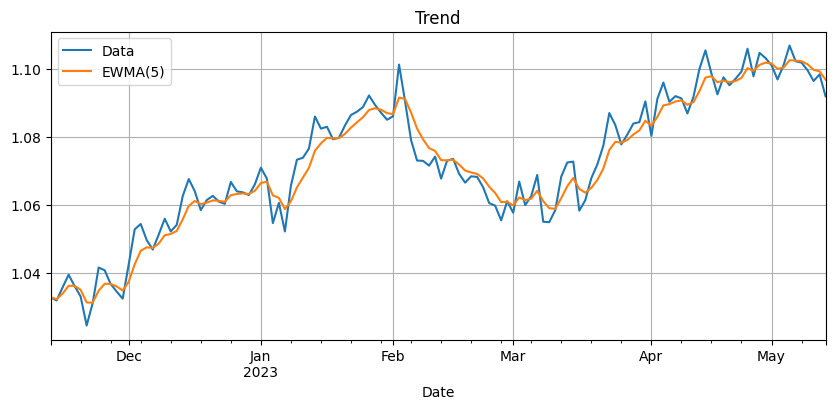

In [ ]:
df["Open"].plot(legend=True, label="Data")
trend["Open"].plot(figsize=(10, 4), title="Trend", grid=True, legend=True, label=f"EWMA({period})");

In [ ]:
seasonal = pd.DataFrame((df["Open"] - trend["Open"]) / trend.Open.mean()).reset_index()

In [ ]:
seasonal["Day"] = seasonal["Date"].apply(lambda row: row.dayofweek)

In [ ]:
seasonal["Seasonality"] = seasonal.groupby("Day")["Open"].transform("mean")

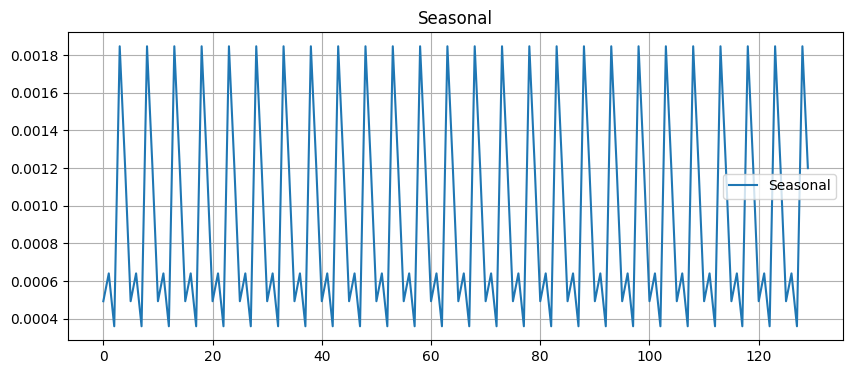

In [ ]:
seasonal["Seasonality"].plot(figsize=(10, 4), title="Seasonal", grid=True, legend=True, label="Seasonal");

In [ ]:
seasonal.groupby("Day")["Open"].transform("min")

0     -0.007550
1     -0.008773
2     -0.007595
3     -0.005976
4     -0.006143
         ...   
125   -0.007550
126   -0.008773
127   -0.007595
128   -0.005976
129   -0.006143
Name: Open, Length: 130, dtype: float64

In [ ]:
df["day"] = df.apply(lambda x: x.name.dayofweek, axis=1)

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,day
Date,,,,,,,
2022-11-14,1.032855,1.035025,1.027359,1.032855,1.032855,0,0
2022-11-15,1.031928,1.047548,1.031385,1.031928,1.031928,0,1
2022-11-16,1.035786,1.043732,1.033645,1.035786,1.035786,0,2
2022-11-17,1.039501,1.040572,1.030949,1.039501,1.039501,0,3
2022-11-18,1.036173,1.039587,1.032802,1.036173,1.036173,0,4
2022-11-21,1.033090,1.033325,1.022704,1.033090,1.033090,0,0
2022-11-22,1.024569,1.029018,1.024338,1.024569,1.024569,0,1
2022-11-23,1.031109,1.038206,1.029813,1.031109,1.031109,0,2
2022-11-24,1.041623,1.044823,1.038368,1.041623,1.041623,0,3
